In [1]:
import tensorflow as tf
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [3]:
np.shape(mnist.train.images)

(55000, 784)

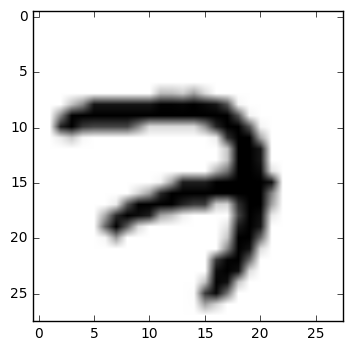

In [4]:
plt.imshow(np.reshape(mnist.train.images[0,:],[28,28]), cmap='Greys')

In [5]:
mnist.train.labels[0,:]

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.])

In [6]:
# Input and weights
x = tf.placeholder(tf.float32, [None, 784])
W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))

# Output (apply softmax)
y_o = tf.nn.softmax(tf.matmul(x, W) + b)

# Cross entropy (loss function)
y_ = tf.placeholder(tf.float32, [None, 10])   # The ground truth (one-hot vectors)
y = tf.matmul(x, W) + b
cross_entropy = tf.reduce_mean(
      tf.nn.softmax_cross_entropy_with_logits(labels=y_, logits=y))

# Add train step
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

In [7]:
# Create a session and train
sess = tf.InteractiveSession()
tf.global_variables_initializer().run()
# Train
for _ in range(1000):
    batch_xs, batch_ys = mnist.train.next_batch(100)
    sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys})

In [8]:
# Test trained model
correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print(sess.run(accuracy, feed_dict={x: mnist.test.images,
                                  y_: mnist.test.labels}))

0.9195


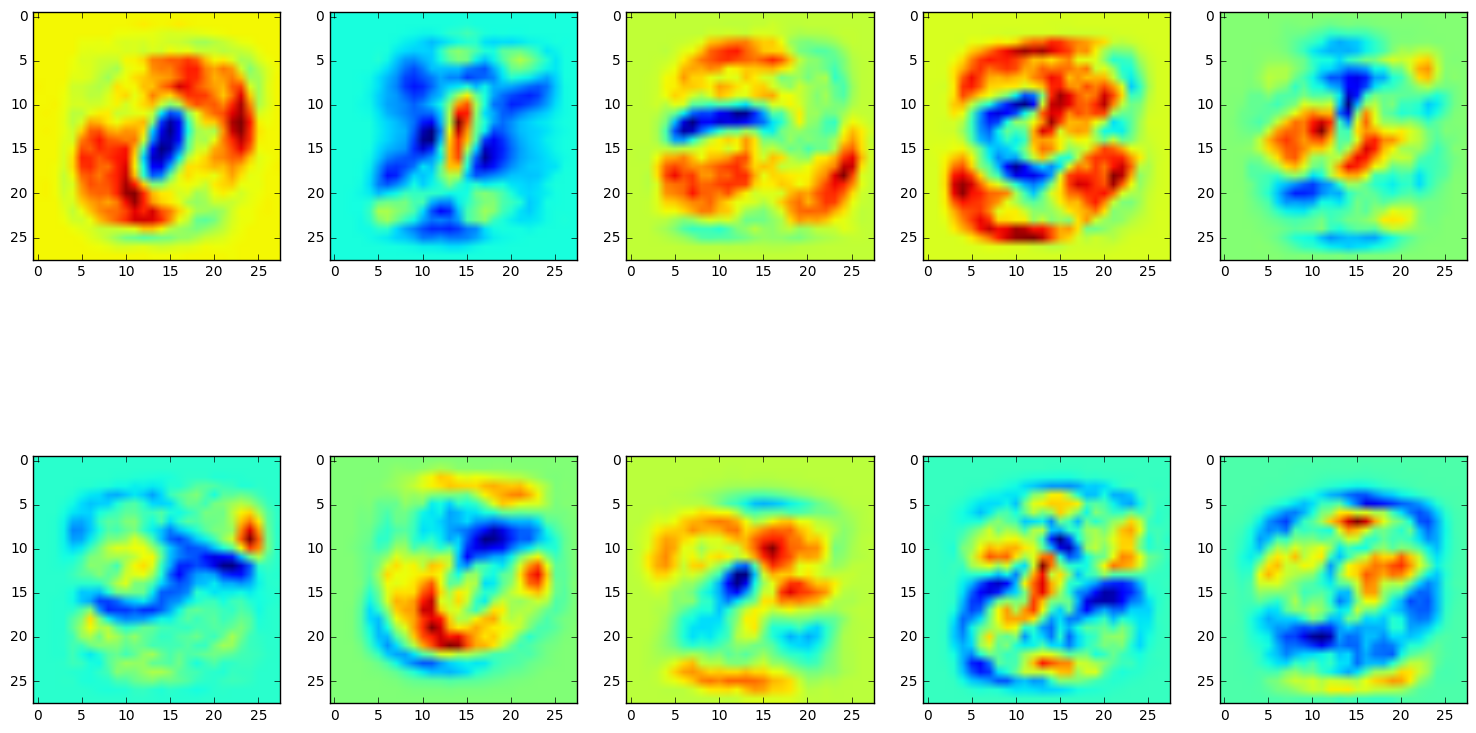

In [11]:
fig, ax = plt.subplots(nrows=2, ncols=5)
fig.set_size_inches(18.5, 10.5)


for i in range(10):    
    ax[int(i/5)][int(i%5)].imshow(np.reshape(W[:,i].eval(),[28,28]))